In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train=pd.read_csv('train[1].csv')

In [3]:
df_train['customer_product_search_score'].describe()

count    10696.000000
mean         5.274847
std          1.882559
min         -0.161940
25%          3.971587
50%          5.218479
75%          6.520364
max         16.638243
Name: customer_product_search_score, dtype: float64

In [4]:
df_test=pd.read_csv('test[1].csv')

In [5]:
df_test.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [6]:
c_train=df_train.copy()
c_test=df_test.copy()
c_train['train']=1
c_test['train']=0

In [7]:
df=pd.concat([c_train,c_test],axis=0,sort=False)

# Missing Values

In [8]:
# Percentage of NAN values
NAN=[(c,df[c].isna().mean()*100) for c in df]
NAN=pd.DataFrame(NAN,columns=['column','% Missing'])

In [9]:
NAN.head(12)

,column,% Missing
0,customer_id,0.000000
1,customer_visit_score,0.000000
2,customer_product_search_score,0.396692
3,customer_ctr_score,0.000000
4,customer_stay_score,0.296122
5,customer_frequency_score,0.000000
6,customer_product_variation_score,0.497262
7,customer_order_score,0.597832
8,customer_affinity_score,0.000000
9,customer_active_segment,0.195553


In [10]:
df.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category,train
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0.0,1
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0.0,1
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0.0,1
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0.0,1
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0.0,1


# Handling Numerical and Categorical Feature

In [11]:
obj_col_df=df.select_dtypes(include=['object'])  # It returns DataFrame object
num_col_df=df.select_dtypes(exclude=['object'])

In [12]:
obj_col_df.dtypes

customer_id                object
customer_active_segment    object
X1                         object
dtype: object

In [13]:
num_col_df.dtypes

customer_visit_score                float64
customer_product_search_score       float64
customer_ctr_score                  float64
customer_stay_score                 float64
customer_frequency_score            float64
customer_product_variation_score    float64
customer_order_score                float64
customer_affinity_score             float64
customer_category                   float64
train                                 int64
dtype: object

In [14]:
df_train['customer_category'].value_counts()

0    9443
1    1295
Name: customer_category, dtype: int64

In [15]:
df_train['X1'].value_counts()

BA    4511
A     2268
F     2235
AA    1611
E       76
Name: X1, dtype: int64

In [16]:
df_train['customer_active_segment'].value_counts()

C     4919
B     4430
D      536
AA     418
A      412
Name: customer_active_segment, dtype: int64

# Categorical Feature

In [17]:
null_counts=obj_col_df.isnull().sum()
print('null count in obj feature:\n{}'.format(null_counts))

null count in obj feature:
customer_id                 0
customer_active_segment    35
X1                         62
dtype: int64


In [18]:
obj_col_df['X1']=obj_col_df['X1'].fillna(obj_col_df['X1'].mode().iloc[0])


c:\users\akhilesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
bin_map={'E':5,'AA':4,'A':3,'BA':2,'F':1}
obj_col_df['X1']=obj_col_df['X1'].map(bin_map)

c:\users\akhilesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
column_missing=['customer_active_segment']
obj_col_df[column_missing]=obj_col_df[column_missing].fillna('None')

c:\users\akhilesh\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
obj_col_df.isnull().sum()

customer_id                0
customer_active_segment    0
X1                         0
dtype: int64

In [22]:
def bar_chart(feature):
    suv=df_train[df_train['customer_category']==1][feature].value_counts()
    dea=df_train[df_train['customer_category']==0][feature].value_counts()
    df=pd.DataFrame([suv,dea])
    df.index=['Suv','Dea']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

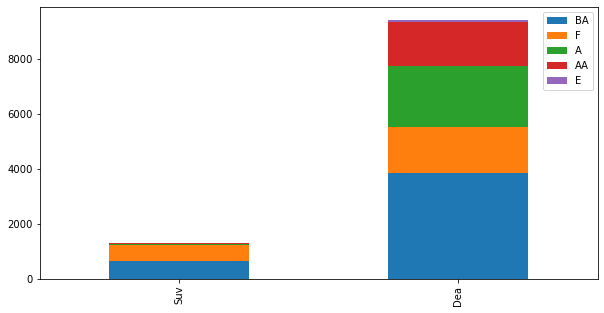

In [23]:
bar_chart('X1')

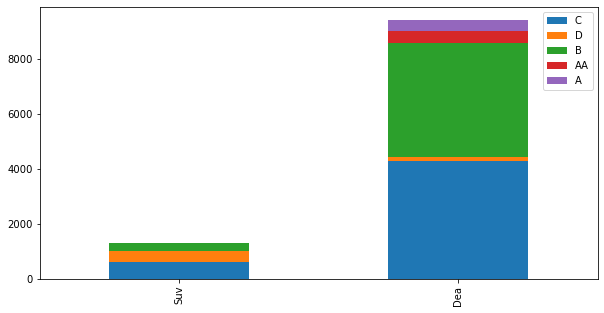

In [24]:
bar_chart('customer_active_segment')

# Numerical Feature

In [25]:
null_counts=num_col_df.isnull().sum()
print('count of null in num feature:\n{}'.format(null_counts))

count of null in num feature:
customer_visit_score                   0
customer_product_search_score         71
customer_ctr_score                     0
customer_stay_score                   53
customer_frequency_score               0
customer_product_variation_score      89
customer_order_score                 107
customer_affinity_score                0
customer_category                   7160
train                                  0
dtype: int64


In [26]:
print(num_col_df['customer_product_search_score'].median())
print(num_col_df['customer_stay_score'].median())
print(num_col_df['customer_product_variation_score'].median())
print(num_col_df['customer_order_score'].median())


5.278668817044663
0.03222748057504883
4.7685244568501535
3.1736496174909803


In [27]:
num_col_df['customer_product_search_score']=num_col_df['customer_product_search_score'].fillna(5.2786)
num_col_df['customer_stay_score']=num_col_df['customer_stay_score'].fillna(0.0322)
num_col_df['customer_product_variation_score']=num_col_df['customer_product_variation_score'].fillna(4.7685)
num_col_df['customer_order_score']=num_col_df['customer_order_score'].fillna(3.1736)


c:\users\akhilesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\akhilesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\akhilesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [28]:
num_col_df.isnull().sum()

customer_visit_score                   0
customer_product_search_score          0
customer_ctr_score                     0
customer_stay_score                    0
customer_frequency_score               0
customer_product_variation_score       0
customer_order_score                   0
customer_affinity_score                0
customer_category                   7160
train                                  0
dtype: int64

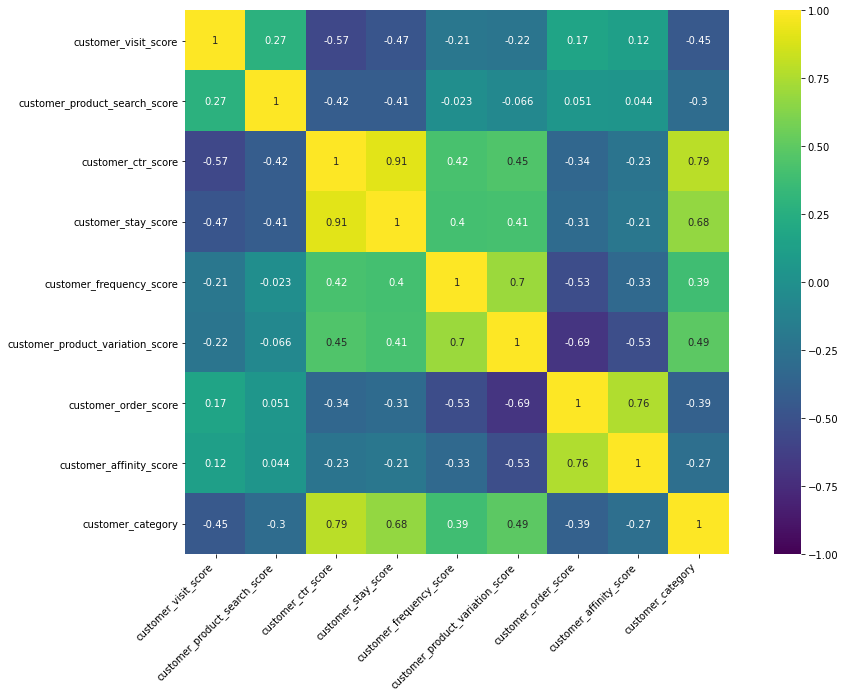

In [29]:
corr = df_train.corr()
plt.figure(figsize=[16,10])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    annot=True,
    cmap='viridis',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

It is seen that the feature 'customer_ctr_score' and 'customer_stay_score' are highly correlated. So we can remove one of them which is 'customer_stay_score'.

In [30]:
num_col_df.drop('customer_stay_score',axis=1,inplace=True)

c:\users\akhilesh\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Distribution of Numerical Features

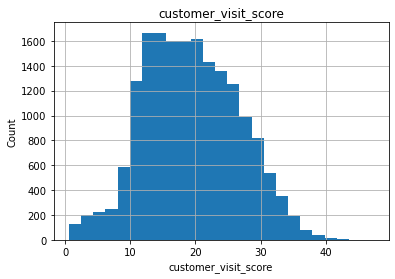

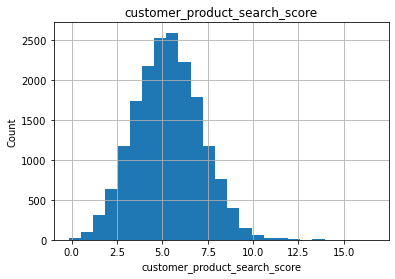

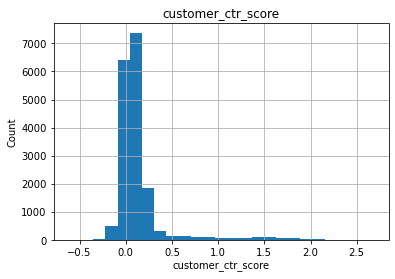

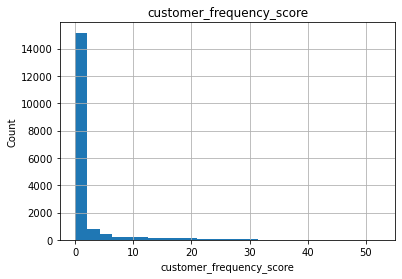

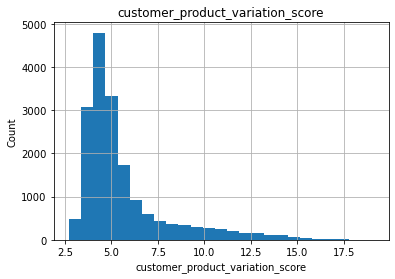

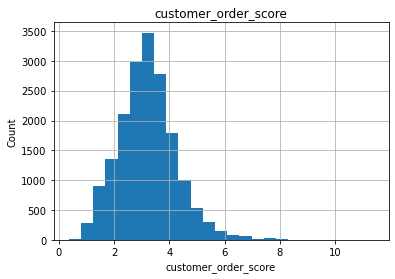

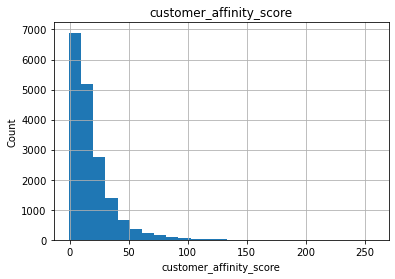

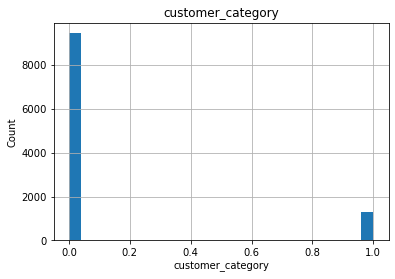

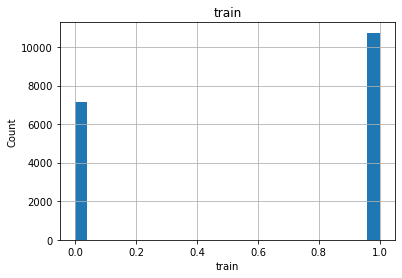

In [31]:
for feature in num_col_df:
    data=num_col_df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Let's Check for outliers

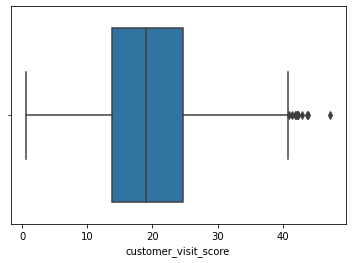

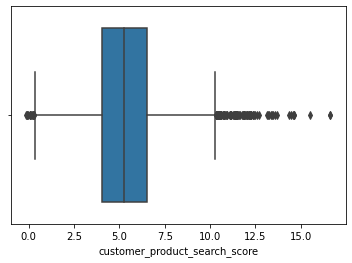

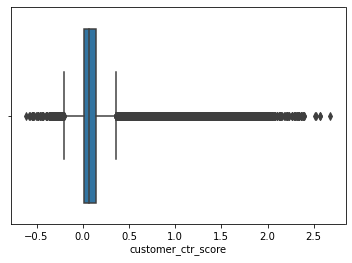

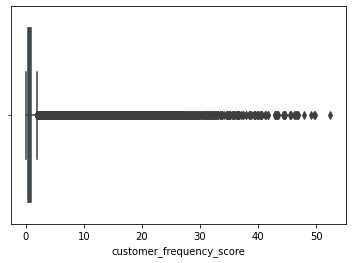

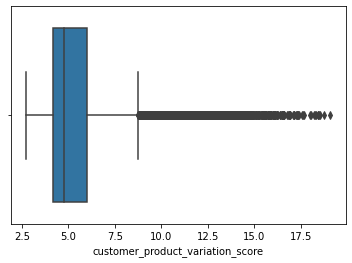

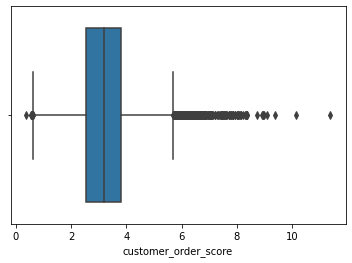

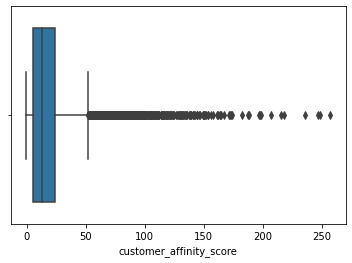

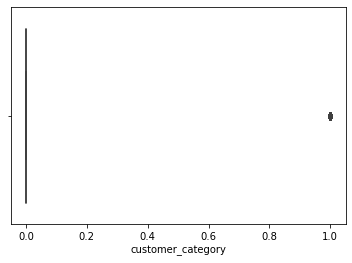

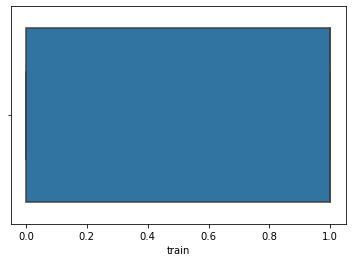

In [32]:
# lOOKING FOR THE OUTLIERS Using Box Plot
for feature in num_col_df.columns:
    sns.boxplot(num_col_df[feature])
    plt.show()

# Chi2 Test

In [34]:
obj_col_df.drop(['customer_id'],axis=1,inplace=True)
obj_col_df.head()

c:\users\akhilesh\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,customer_active_segment,X1
0,C,1
1,C,3
2,C,2
3,AA,1
4,C,4


# Relationship b/w 'X1' and 'customer_active_segment'

In [35]:
dataset_table=pd.crosstab(obj_col_df['customer_active_segment'],obj_col_df['X1'])
print(dataset_table)

X1                          1     2     3     4   5
customer_active_segment                            
A                         138   271   145   101   6
AA                        154   311   153   113   8
B                        1290  3106  1732  1367  62
C                        1640  3337  1780  1342  71
D                         279   347    64    45   1
None                        6    11     9     9   0


In [36]:
observed_values=dataset_table.values

In [37]:
import scipy.stats as stats

In [38]:
dataset_table.values

array([[ 138,  271,  145,  101,    6],
       [ 154,  311,  153,  113,    8],
       [1290, 3106, 1732, 1367,   62],
       [1640, 3337, 1780, 1342,   71],
       [ 279,  347,   64,   45,    1],
       [   6,   11,    9,    9,    0]], dtype=int64)

In [39]:
val=stats.chi2_contingency(dataset_table)

In [40]:
val

(290.8864389025961,
 5.845551117293136e-50,
 20,
 array([[1.29518773e+02, 2.72665270e+02, 1.43405017e+02, 1.09945078e+02,
         5.46586211e+00],
        [1.44802380e+02, 3.04840597e+02, 1.60327243e+02, 1.22918929e+02,
         6.11085037e+00],
        [1.48074640e+03, 3.11729417e+03, 1.63950335e+03, 1.25696664e+03,
         6.24894402e+01],
        [1.60085987e+03, 3.37015924e+03, 1.77249469e+03, 1.35892781e+03,
         6.75583864e+01],
        [1.44214549e+02, 3.03603084e+02, 1.59676388e+02, 1.22419935e+02,
         6.08604313e+00],
        [6.85802883e+00, 1.44376467e+01, 7.59330651e+00, 5.82160018e+00,
         2.89417812e-01]]))

In [41]:
expected_values=val[3]

In [42]:
no_of_rows=6
no_of_col=6
degree_of_freedom=(no_of_rows-1)*(no_of_col-1)
print(degree_of_freedom)
alpha=0.05

25


In [43]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2/e for o,e in zip(observed_values,expected_values)])
chi_square_stat=sum(chi_square)

In [44]:
print(chi_square_stat)

290.88643890259607


In [45]:
critical_value=chi2.ppf(q=1-alpha,df=degree_of_freedom)
print(critical_value)

37.65248413348277


In [46]:
#p-value
p_value=1-chi2.cdf(x=chi_square_stat,df=degree_of_freedom)
print(p_value)

0.0


From the above CHi2 test of the categorical feature in our dataset , we find that they are not independent

# Relationship b/w Categorical Feature to Output Variable

In [59]:
dataset_table1=pd.crosstab(obj_col_df['X1'],num_col_df['customer_category'])
dataset_table2=pd.crosstab(obj_col_df['customer_active_segment'],num_col_df['customer_category'])
print(dataset_table1)
print(dataset_table2)

customer_category   0.0  1.0
X1                          
1                  1658  577
2                  3886  662
3                  2236   32
4                  1589   22
5                    74    2
customer_category         0.0  1.0
customer_active_segment           
A                         410    2
AA                        416    2
B                        4146  284
C                        4295  624
D                         155  381
None                       21    2


In [61]:
val_1=stats.chi2_contingency(dataset_table1)
val_2=stats.chi2_contingency(dataset_table2)

In [70]:
val_1
val_2

(848.1332111402372,
 2.8752143570144288e-182,
 4,
 array([[1965.45958279,  269.54041721],
        [3999.51238592,  548.48761408],
        [1994.4797914 ,  273.5202086 ],
        [1416.71382008,  194.28617992],
        [  66.83441982,    9.16558018]]))

In [71]:
expected_values1=val_1[3]
expected_values2=val_2[3]

In [72]:
observed_values1=dataset_table1.values
observed_values2=dataset_table2.values

In [73]:
# customer_active_segment
no_of_rows=6
no_of_col=2
degree_of_freedom=(no_of_rows-1)*(no_of_col-1)
print(degree_of_freedom)
alpha=0.05

5


In [74]:
# X1
no_of_rows=5
no_of_col=2
degree_of_freedom=(no_of_rows-1)*(no_of_col-1)
print(degree_of_freedom)
alpha=0.05

4


In [75]:
chi_square=sum([(o-e)**2/e for o,e in zip(observed_values1,expected_values1)])
chi_square_stat=sum(chi_square)
print(chi_square_stat)

848.1332111402372


In [76]:
chi_square=sum([(o-e)**2/e for o,e in zip(observed_values2,expected_values2)])
chi_square_stat=sum(chi_square)
print(chi_square_stat)

2000.874355069056


In [54]:
# customer active segment
critical_value=chi2.ppf(q=1-alpha,df=5)
print(critical_value)

11.070497693516351


In [77]:
# X1
critical_value=chi2.ppf(q=1-alpha,df=4)
print(critical_value)

9.487729036781154


We reject our null hypothesis for the above features with respect to output features

# Encoding the Categorical Variable

In [78]:
obj_col_df_en=pd.get_dummies(data=obj_col_df,drop_first=True)

In [79]:
obj_col_df_en.head()

,X1,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D,customer_active_segment_None
0,1,0,0,1,0,0
1,3,0,0,1,0,0
2,2,0,0,1,0,0
3,1,1,0,0,0,0
4,4,0,0,1,0,0


In [80]:
num_col_df.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category,train
0,13.168425,9.447662,-0.070203,0.436956,4.705761,2.537985,7.959503,0.0,1
1,17.092979,7.329056,0.153298,0.380340,4.205138,4.193444,17.517381,0.0,1
2,17.505334,5.143676,0.106709,0.417648,4.479070,3.878971,12.595155,0.0,1
3,31.423381,4.917740,-0.020226,0.778130,5.055535,2.708940,4.795073,0.0,1
4,11.909502,4.237073,0.187178,0.162067,3.445247,3.677360,56.636326,0.0,1


In [81]:
df_final=pd.concat([obj_col_df_en,num_col_df],axis=1,sort=False)
df_final.head()

,X1,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D,customer_active_segment_None,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category,train
0,1,0,0,1,0,0,13.168425,9.447662,-0.070203,0.436956,4.705761,2.537985,7.959503,0.0,1
1,3,0,0,1,0,0,17.092979,7.329056,0.153298,0.380340,4.205138,4.193444,17.517381,0.0,1
2,2,0,0,1,0,0,17.505334,5.143676,0.106709,0.417648,4.479070,3.878971,12.595155,0.0,1
3,1,1,0,0,0,0,31.423381,4.917740,-0.020226,0.778130,5.055535,2.708940,4.795073,0.0,1
4,4,0,0,1,0,0,11.909502,4.237073,0.187178,0.162067,3.445247,3.677360,56.636326,0.0,1


In [82]:
df_final.isnull().sum()

X1                                     0
customer_active_segment_AA             0
customer_active_segment_B              0
customer_active_segment_C              0
customer_active_segment_D              0
customer_active_segment_None           0
customer_visit_score                   0
customer_product_search_score          0
customer_ctr_score                     0
customer_frequency_score               0
customer_product_variation_score       0
customer_order_score                   0
customer_affinity_score                0
customer_category                   7160
train                                  0
dtype: int64

# Train Test Split

In [83]:
df_train=df_final[df_final['train']==1]
df_train=df_train.drop(['train'],axis=1)
df_test=df_final[df_final['train']==0]
df_test=df_test.drop(['customer_category'],axis=1)
df_test=df_test.drop(['train'],axis=1)

In [84]:
target=df_train['customer_category']
df_train=df_train.drop(['customer_category'],axis=1)

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_train,target,test_size=0.3,random_state=0)

# Modelling

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import fbeta_score

# Cross Validation  K-fold

In [86]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,shuffle=True,random_state=0)

In [89]:
clf=RandomForestClassifier()
scoring='f1_macro'
score=cross_val_score(clf,df_train,target,cv=k_fold,n_jobs=-1,scoring=scoring)
print(round(np.mean(score)*100,2))

94.04


In [91]:
clf=KNeighborsClassifier(n_neighbors=13)
scoring='f1_macro'
score=cross_val_score(clf,df_train,target,cv=k_fold,n_jobs=-1,scoring=scoring)
print(round(np.mean(score)*100,2))

86.88


In [70]:
from sklearn.ensemble import AdaBoostClassifier
cls=AdaBoostClassifier(n_estimators=100)
cls.fit(x_train,y_train)
predict=cls.predict(x_test)
fbeta_score(y_test,predict,average='macro',beta=0.5)

0.9507568119108036

In [90]:
from xgboost.sklearn import XGBClassifier
clf=XGBClassifier()
scoring='f1_macro'
score=cross_val_score(clf,df_train,target,cv=k_fold,n_jobs=-1,scoring=scoring)
print(round(np.mean(score)*100,2))

93.94


In [92]:
clf=SVC()
scoring='f1_macro'
score=cross_val_score(clf,df_train,target,cv=k_fold,n_jobs=-1,scoring=scoring)
print(round(np.mean(score)*100,2))

86.8


In [93]:
clf=GaussianNB()
scoring='f1_macro'
score=cross_val_score(clf,df_train,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score)*100,2))

84.33


# Testing

In [94]:
cls=RandomForestClassifier()
cls.fit(df_train,target)
predict=cls.predict(df_test)

In [95]:
test_id=pd.read_csv('test[1].csv')

In [96]:
submt_sol=pd.DataFrame({'customer_id':test_id['customer_id'],'customer_category':predict})

In [97]:
submt_sol.to_csv('amazon_sol_6.csv',index=False)